In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from scripts.transformers import load_and_save_bronze

raw_zone = os.path.expanduser('~/Downloads/dataset.parquet')
bronze_zone = "./data/bronze"

df = load_and_save_bronze(raw_zone, bronze_zone)
df.show(5)


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/01/09 11:25:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+--------------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee| ingestion_timestamp|         source_file|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+--------------------+--------------------+
|   

In [2]:
df.show() 

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+--------------------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee| ingestion_timestamp|         source_file|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+--------------------+--------------------+
|   

In [3]:
unique = df.select("VendorId").distinct()
unique.show()

+--------+
|VendorId|
+--------+
|       1|
|       7|
|       2|
|       6|
+--------+



In [4]:
unique = df.select("cbd_congestion_fee").distinct()
unique.show()

+------------------+
|cbd_congestion_fee|
+------------------+
|               0.0|
|             -0.75|
|              0.75|
+------------------+



In [5]:
columns = df.columns
row_count = df.count()
print("Number of rows: ", row_count)
print("Number of columns: ", len(columns))
print(columns)

Number of rows:  3475226
Number of columns:  22
['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'cbd_congestion_fee', 'ingestion_timestamp', 'source_file']


In [6]:
df.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- cbd_congestion_fee: double (nullable = true)
 |-- ingestion_timestamp: timestamp (nullable = false)
 |-- source_file: str

In [7]:
df.summary()

DataFrame[summary: string, VendorID: string, passenger_count: string, trip_distance: string, RatecodeID: string, store_and_fwd_flag: string, PULocationID: string, DOLocationID: string, payment_type: string, fare_amount: string, extra: string, mta_tax: string, tip_amount: string, tolls_amount: string, improvement_surcharge: string, total_amount: string, congestion_surcharge: string, Airport_fee: string, cbd_congestion_fee: string, source_file: string]

In [8]:
df.describe().show()

26/01/09 11:25:57 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+---------------------+------------------+--------------------+-------------------+-------------------+--------------------+
|summary|          VendorID|   passenger_count|    trip_distance|       RatecodeID|store_and_fwd_flag|     PULocationID|      DOLocationID|      payment_type|       fare_amount|             extra|            mta_tax|        tip_amount|       tolls_amount|improvement_surcharge|      total_amount|congestion_surcharge|        Airport_fee| cbd_congestion_fee|         source_file|
+-------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------

In [9]:
from pyspark.sql.functions import col, sum, when, count

null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

null_counts.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|ingestion_timestamp|source_file|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------------+-----------+
|       0|                   0|   

In [10]:
percentage_od_null = (540149 / df.count())*100
percentage_od_null

15.54284527107014

In [11]:
# Drop all the columns with the null values
df = df.na.drop(how='any')

In [12]:
# Check for nulls after drop => 0
null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

null_counts.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|ingestion_timestamp|source_file|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------------+-----------+
|       0|                   0|   

In [13]:
df = df.drop("ingestion_timestamp", "source_file")
df.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|       1| 2025-01-01 00:18:38|  2025-01-01 00:26:59|              1|          1.6|         1|                 N|         229|    

In [14]:
from pyspark.sql.functions import col, unix_timestamp, round

df = df.withColumn("trip_duration", 
    (unix_timestamp(col("tpep_dropoff_datetime")) - 
     unix_timestamp(col("tpep_pickup_datetime"))) / 60
)

df = df.withColumn("trip_duration", round(col("trip_duration"), 2))

In [15]:
df.show(20)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|trip_duration|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------+
|       1| 2025-01-01 00:18:38|  2025-01-01 00:26:59|              1|          1.6|     

In [16]:
row_count = df.count()
print("Number of rows: ", row_count)

Number of rows:  2935077


# Analysis of Numerical Data

In [17]:
numerical_cols = ['passenger_count','trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','Airport_fee','cbd_congestion_fee','trip_duration']
print(len(numerical_cols))

15


In [18]:
# Select all the rows with the passenger count greater than 0
df = df.filter(col("passenger_count") > 0)

From the trip distance summary, we can see that the minimum is 0 and the maximum is 44,730.3, which are clearly invalid. Therefore, I will keep only trips with distances between 1 and 200 miles.

In [19]:
df.select("trip_distance").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+-------------+
|summary|trip_distance|
+-------+-------------+
|  count|      2910421|
|    min|          0.0|
|    25%|         0.96|
|    50%|          1.6|
|    75%|          3.0|
|    max|      44730.3|
+-------+-------------+



In [20]:
df = df.filter(col("trip_distance") > 0)
df = df.filter(col("trip_distance") < 200)

From the trip duration summary, we can see that the min is -56.03 and max is 5626.32, which is invalid, therefore, I will keep only trips with durations between 1 and 1440 minutes (24 hours), which us a reasonable for a taxi

In [21]:
df.select("trip_duration").summary("count", "min", "25%", "50%", "75%", "max").show()


+-------+-------------+
|summary|trip_duration|
+-------+-------------+
|  count|      2872499|
|    min|       -56.03|
|    25%|         7.05|
|    50%|        11.35|
|    75%|        18.15|
|    max|      5626.32|
+-------+-------------+



In [22]:
df = df.filter(col("trip_duration") > 0)
df = df.filter(col("trip_duration") <= 120)


In [23]:
df.select("trip_duration").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+-------------+
|summary|trip_duration|
+-------+-------------+
|  count|      2869346|
|    min|         0.02|
|    25%|         7.05|
|    50%|        11.35|
|    75%|        18.13|
|    max|       119.88|
+-------+-------------+



In [24]:
df.select("fare_amount").summary("count", "min", "25%", "50%", "75%", "max").show()


+-------+-----------+
|summary|fare_amount|
+-------+-----------+
|  count|    2869346|
|    min|     -900.0|
|    25%|        8.6|
|    50%|       12.1|
|    75%|       19.1|
|    max|  863372.12|
+-------+-----------+



In [25]:
df = df.filter(
    (col("fare_amount") > 0) &
    (col("fare_amount") <= 500)
)


In [26]:
df.select("extra").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+-------+
|summary|  extra|
+-------+-------+
|  count|2813688|
|    min|    0.0|
|    25%|    0.0|
|    50%|    1.0|
|    75%|    2.5|
|    max|   15.0|
+-------+-------+



In [27]:
df.select("mta_tax").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+-------+
|summary|mta_tax|
+-------+-------+
|  count|2813688|
|    min|    0.0|
|    25%|    0.5|
|    50%|    0.5|
|    75%|    0.5|
|    max|    6.5|
+-------+-------+



In [28]:
df.select("tip_amount").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+----------+
|summary|tip_amount|
+-------+----------+
|  count|   2813688|
|    min|       0.0|
|    25%|      1.34|
|    50%|      2.89|
|    75%|      4.27|
|    max|     400.0|
+-------+----------+



In [29]:
df.select("tolls_amount").summary("count", "min", "25%", "50%", "75%", "max").show()


+-------+------------+
|summary|tolls_amount|
+-------+------------+
|  count|     2813688|
|    min|         0.0|
|    25%|         0.0|
|    50%|         0.0|
|    75%|         0.0|
|    max|      126.94|
+-------+------------+



In [30]:
df.select("improvement_surcharge").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+---------------------+
|summary|improvement_surcharge|
+-------+---------------------+
|  count|              2813688|
|    min|                  0.0|
|    25%|                  1.0|
|    50%|                  1.0|
|    75%|                  1.0|
|    max|                  1.0|
+-------+---------------------+



In [31]:
df.select("Airport_fee").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+-----------+
|summary|Airport_fee|
+-------+-----------+
|  count|    2813688|
|    min|        0.0|
|    25%|        0.0|
|    50%|        0.0|
|    75%|        0.0|
|    max|       1.75|
+-------+-----------+



In [32]:
df.select("cbd_congestion_fee").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+------------------+
|summary|cbd_congestion_fee|
+-------+------------------+
|  count|           2813688|
|    min|               0.0|
|    25%|               0.0|
|    50%|              0.75|
|    75%|              0.75|
|    max|              0.75|
+-------+------------------+



In [33]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=numerical_cols,
    outputCol="features"
)

df_vector = assembler.transform(df).select("features")


In [34]:
from pyspark.ml.stat import Correlation

corr_matrix = Correlation.corr(df_vector, "features", "pearson")


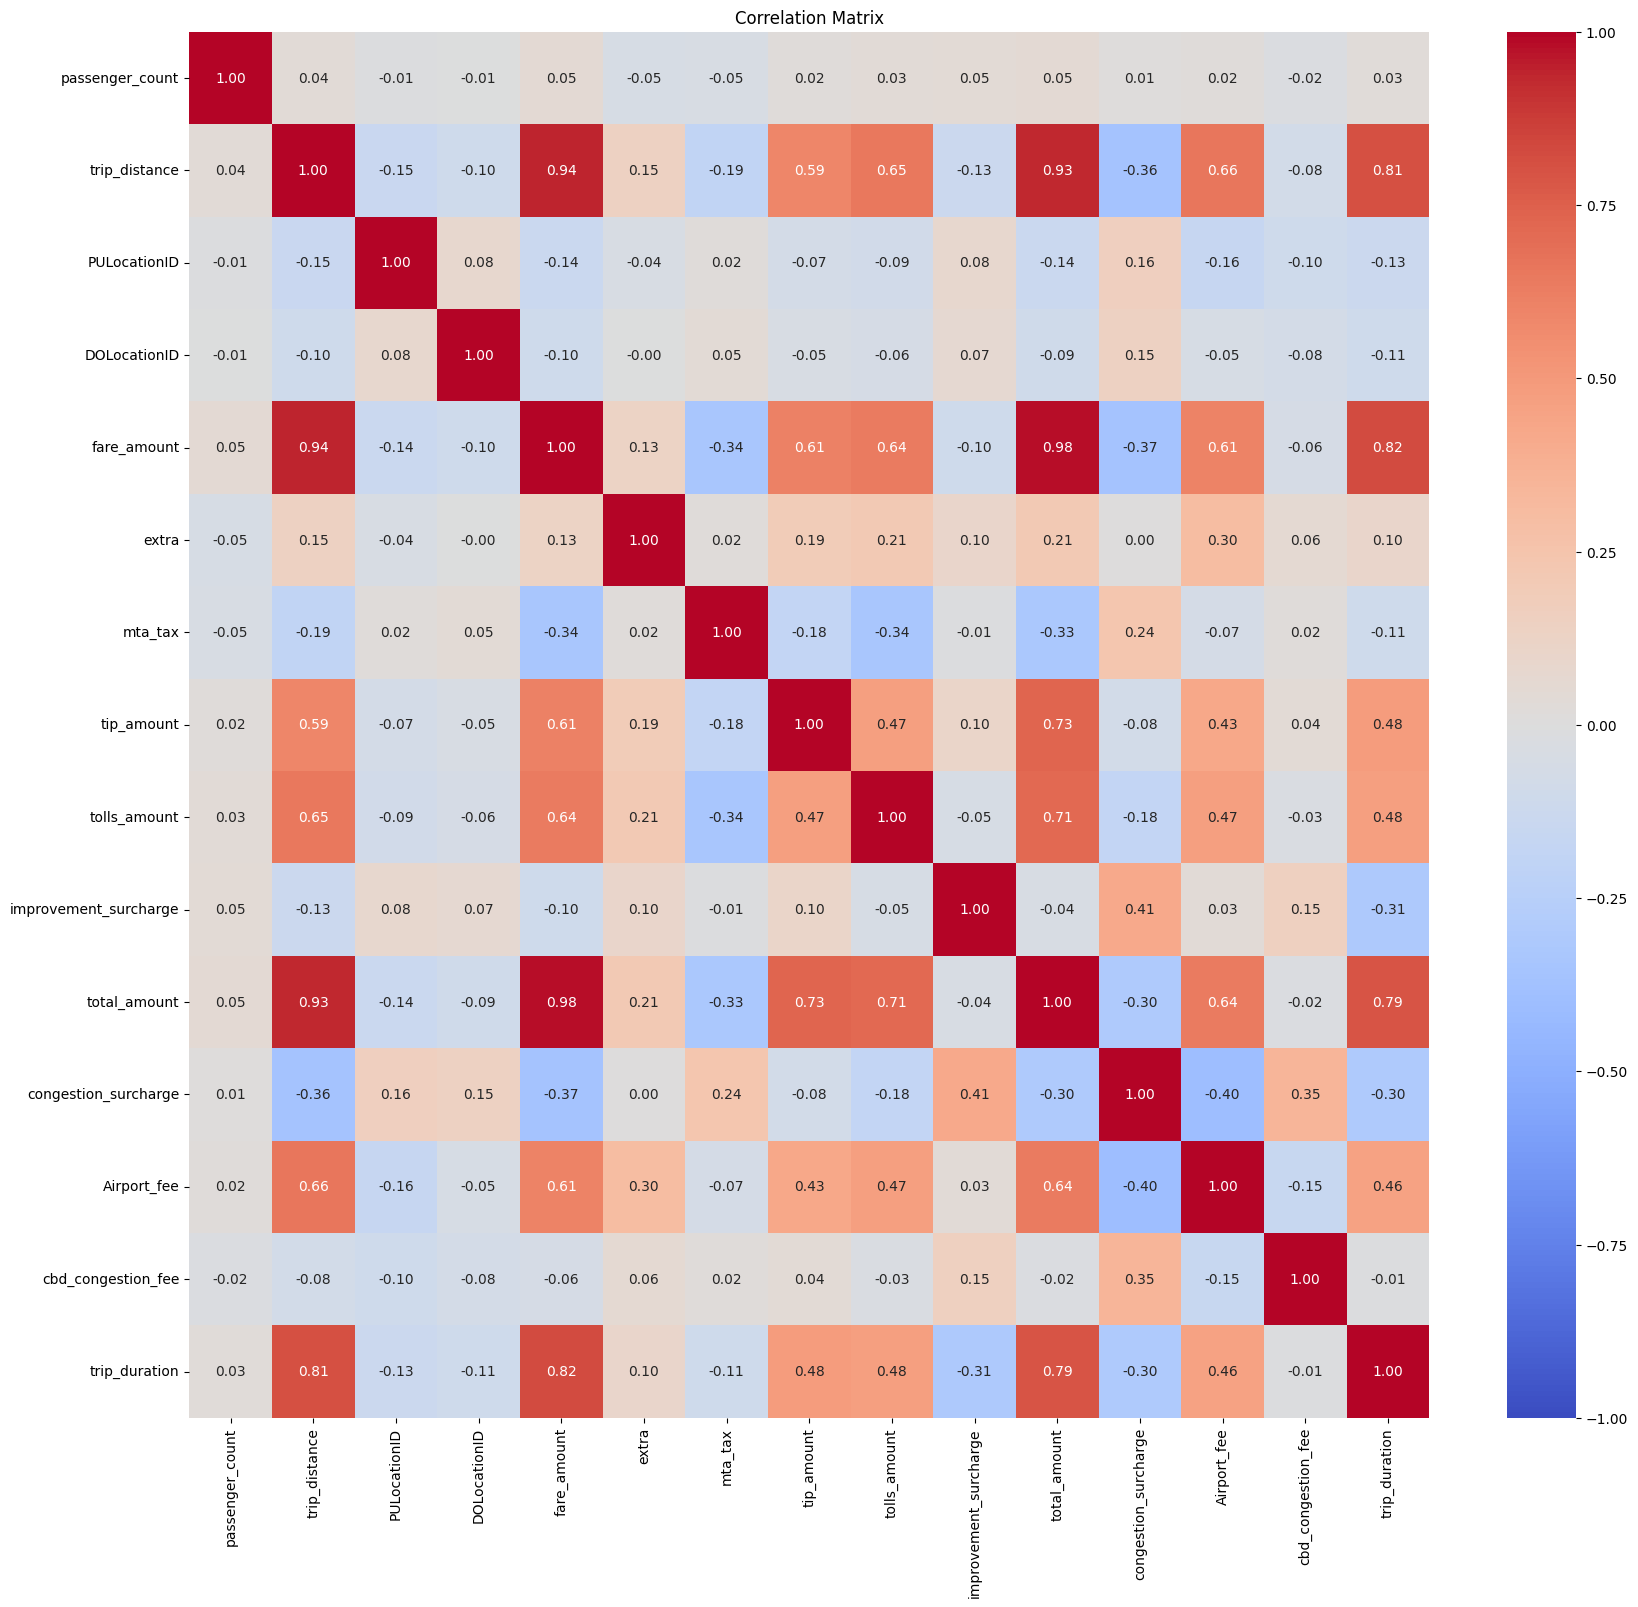

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_array = corr_matrix.head()[0].toArray()


corr_df = pd.DataFrame(
    corr_array,
    columns=numerical_cols,
    index=numerical_cols
)

plt.figure(figsize=(20,18))
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.title("Correlation Matrix")
plt.show()



From the above analysis of correlation matrix between numerical features, we can see that there is a correlation between trip_duration and (trip_distance, fare_amount, tip_amount, tolls_amount, total_amount, Airport_fee). Therefore our numerical DataFrame will include these features.

In [36]:
df_numerical = df.select("trip_distance", "fare_amount", "tip_amount", "tolls_amount", "total_amount", "Airport_fee")
df_numerical.show(5)

+-------------+-----------+----------+------------+------------+-----------+
|trip_distance|fare_amount|tip_amount|tolls_amount|total_amount|Airport_fee|
+-------------+-----------+----------+------------+------------+-----------+
|          1.6|       10.0|       3.0|         0.0|        18.0|        0.0|
|          0.5|        5.1|      2.02|         0.0|       12.12|        0.0|
|          0.6|        5.1|       2.0|         0.0|        12.1|        0.0|
|         0.52|        7.2|       0.0|         0.0|         9.7|        0.0|
|         0.66|        5.8|       0.0|         0.0|         8.3|        0.0|
+-------------+-----------+----------+------------+------------+-----------+
only showing top 5 rows


# Analysis of Categorical Data

In [37]:
from pyspark.sql.functions import hour, dayofweek, month

df = df.withColumn("pickuphour", hour("tpep_pickup_datetime")) \
       .withColumn("dayof_week", dayofweek("tpep_pickup_datetime")) \
       .withColumn("month", month("tpep_pickup_datetime"))

In [38]:
df.show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------+----------+----------+-----+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|trip_duration|pickuphour|dayof_week|month|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+-------------+----------+----------+-----+
|   

In [39]:
columns = ["VendorID", "RatecodeID", "store_and_fwd_flag", "payment_type","pickuphour","dayof_week","month"]
df_categorical = df.select("VendorID", "RatecodeID", "store_and_fwd_flag", "payment_type","pickuphour","dayof_week","month", "trip_duration")

In [40]:
from pyspark.sql.functions import expr

pdfs = {}

for col_name in columns:
    agg_df = (
        df.groupBy(col_name)
          .agg(expr("percentile_approx(trip_duration, 0.5)").alias("median_trip_duration"))
          .orderBy(col_name)
    )
    
    # convert ONLY the aggregated result
    pdfs[col_name] = agg_df.toPandas()


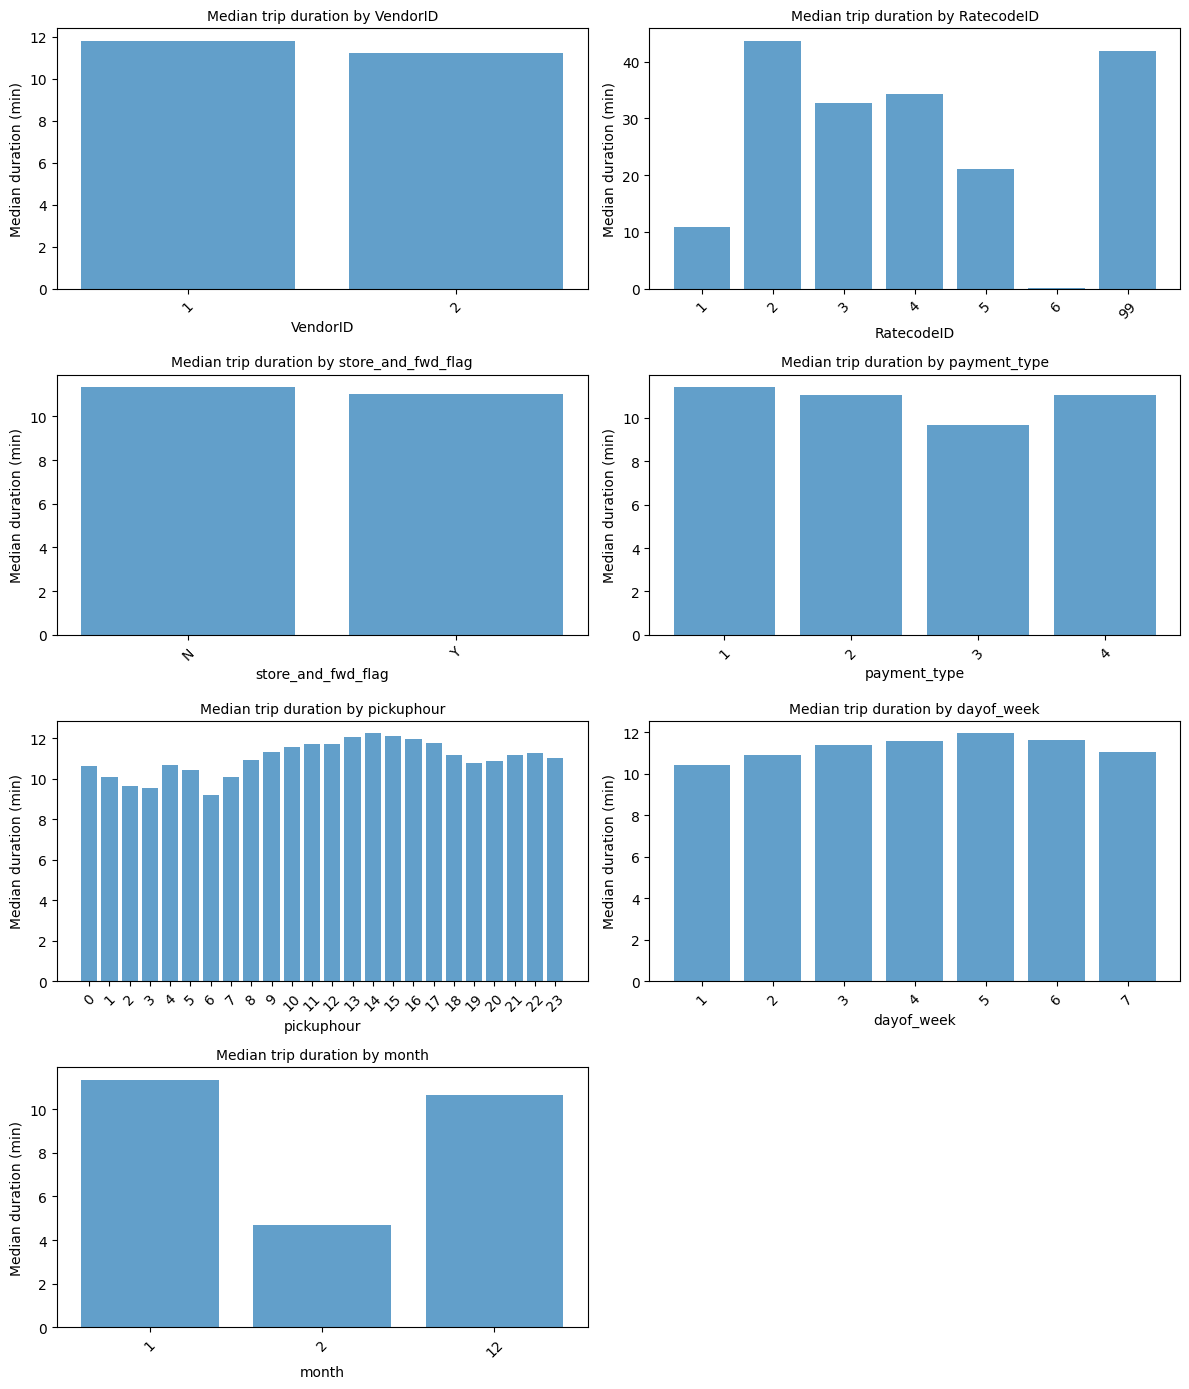

In [41]:
import matplotlib.pyplot as plt
import math

n_cols = 2
n_rows = math.ceil(len(columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 14))
axes = axes.flatten()

for i, col_name in enumerate(columns):
    pdf = pdfs[col_name]

    axes[i].bar(
        pdf[col_name].astype(str),
        pdf["median_trip_duration"],
        alpha=0.7
    )
    
    axes[i].set_title(f"Median trip duration by {col_name}", fontsize=10)
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel("Median duration (min)")
    axes[i].tick_params(axis="x", rotation=45)

# remove empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



From the above analysis of categorical features using graphs, we can see that RateCodeID has a value of 99 which is invalid, therefore I will keep only values between 1 and 6. the RateCodeID, pickuphour and dayof_week has a significant impact on the trip_duration, therefore these features will be included in our categorical DataFrame. the month feature has a low impact as we just have three month of data, so we can't include it as an important feature.

In [42]:
df = df.filter(col("RateCodeID") != 99)


In [43]:
df.select("RateCodeID").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+----------+
|summary|RateCodeID|
+-------+----------+
|  count|   2775092|
|    min|         1|
|    25%|         1|
|    50%|         1|
|    75%|         1|
|    max|         6|
+-------+----------+



In [44]:
categorical_cols = ["RateCodeID", "pickuphour", "dayof_week"]

In [45]:
def silver_df(df, num_cols, cat_cols, target):
    selected_cols = num_cols + cat_cols + [target]
    return df.select(*selected_cols)

num_cols = [
    "trip_distance",
    "fare_amount",
    "tip_amount",
    "tolls_amount",
    "total_amount",
    "Airport_fee"
]

cat_cols = [
    "RatecodeID",
    "pickuphour",
    "dayof_week"
]

target = "trip_duration"

df_silver = silver_df(df, num_cols, cat_cols, target)


In [46]:

df_silver.show(5)

+-------------+-----------+----------+------------+------------+-----------+----------+----------+----------+-------------+
|trip_distance|fare_amount|tip_amount|tolls_amount|total_amount|Airport_fee|RatecodeID|pickuphour|dayof_week|trip_duration|
+-------------+-----------+----------+------------+------------+-----------+----------+----------+----------+-------------+
|          1.6|       10.0|       3.0|         0.0|        18.0|        0.0|         1|         0|         4|         8.35|
|          0.5|        5.1|      2.02|         0.0|       12.12|        0.0|         1|         0|         4|         2.55|
|          0.6|        5.1|       2.0|         0.0|        12.1|        0.0|         1|         0|         4|         1.95|
|         0.52|        7.2|       0.0|         0.0|         9.7|        0.0|         1|         0|         4|         5.57|
|         0.66|        5.8|       0.0|         0.0|         8.3|        0.0|         1|         0|         4|         3.53|
+-------

In [47]:
df_silver.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+
|summary|     trip_distance|       fare_amount|        tip_amount|      tolls_amount|      total_amount|        Airport_fee|         RatecodeID|        pickuphour|        dayof_week|     trip_duration|
+-------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+
|  count|           2775092|           2775092|           2775092|           2775092|           2775092|            2775092|            2775092|           2775092|           2775092|           2775092|
|   mean|3.1055935514929605| 17.70860604621479|3.5487196172228392|0.5100942599381313| 27.24030055579069|0.13479706258387109| 1.0651877487304926|14.429897459255406|4.2482447428769925|14.1359199

In [48]:
df_silver.printSchema()
df_silver.count()

root
 |-- trip_distance: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- pickuphour: integer (nullable = true)
 |-- dayof_week: integer (nullable = true)
 |-- trip_duration: double (nullable = true)



2775092

# ML Model Training

In [49]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

indexers = [
    StringIndexer(inputCol=c, outputCol=f"{c}_idx", handleInvalid="keep")
    for c in cat_cols
]

encoders = [
    OneHotEncoder(
        inputCol=f"{c}_idx",
        outputCol=f"{c}_ohe"
    )
    for c in cat_cols
]

In [50]:
from pyspark.ml.feature import VectorAssembler

feature_cols = num_cols + [f"{c}_ohe" for c in cat_cols]

assembler = VectorAssembler(
    inputCols=feature_cols,
    outputCol="features"
)

In [51]:
train_df, test_df = df_silver.randomSplit([0.8, 0.2], seed=42)

In [52]:
from pyspark.ml.regression import GBTRegressor

model = GBTRegressor(
    featuresCol="features",
    labelCol=target,
    maxIter=50,
    maxDepth=5
)

In [53]:
from pyspark.ml import Pipeline

pipeline = Pipeline(
    stages=indexers + encoders + [assembler, model]
)

pipeline_model = pipeline.fit(train_df)

26/01/09 11:27:26 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 18.0 MiB so far)
26/01/09 11:27:26 WARN BlockManager: Persisting block rdd_389_6 to disk instead.
26/01/09 11:27:26 WARN MemoryStore: Not enough space to cache rdd_389_10 in memory! (computed 40.8 MiB so far)
26/01/09 11:27:26 WARN BlockManager: Persisting block rdd_389_10 to disk instead.
26/01/09 11:27:27 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 63.6 MiB so far)
26/01/09 11:27:27 WARN BlockManager: Persisting block rdd_389_2 to disk instead.
26/01/09 11:27:29 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 145.8 MiB so far)
26/01/09 11:27:29 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 145.8 MiB so far)
26/01/09 11:27:29 WARN MemoryStore: Not enough space to cache rdd_389_6 in memory! (computed 3.5 MiB so far)
26/01/09 11:27:30 WARN MemoryStore: Not enough space to cache rdd_389_2 in memory! (computed 9

In [54]:
from pyspark.ml.evaluation import RegressionEvaluator

predictions = pipeline_model.transform(test_df)

evaluator = RegressionEvaluator(
    labelCol=target,
    predictionCol="prediction",
    metricName="rmse"
)

rmse = evaluator.evaluate(predictions)
print(f"RMSE: {rmse}")
for metric in ["mae", "r2"]:
    evaluator.setMetricName(metric)
    print(metric, evaluator.evaluate(predictions))

RMSE: 3.0417716551406144


mae 1.5172460321032375


r2 0.9193706767473323


In [55]:
df_silver.select("trip_duration").summary("count", "min", "25%", "50%", "75%", "max").show()

+-------+-------------+
|summary|trip_duration|
+-------+-------------+
|  count|      2775092|
|    min|         0.02|
|    25%|         7.02|
|    50%|        11.23|
|    75%|        17.78|
|    max|       119.88|
+-------+-------------+



In [59]:
pipeline_model.write().overwrite().save("../models/trip_duration_model")

In [61]:
from pyspark.sql import Row
from pyspark.ml import PipelineModel
from pyspark.sql import SparkSession 

spark = SparkSession.builder.getOrCreate()

model = PipelineModel.load("../models/trip_duration_model")

test_data = [
    Row(trip_distance=1.6, fare_amount=10.0, tip_amount=3.0, 
        tolls_amount=0.0, total_amount=18.0, Airport_fee=0.0, 
        RatecodeID=1, pickuphour=0, dayof_week=4)
]

df_test = spark.createDataFrame(test_data)

In [ ]:
predictions = model.transform(df_test)

predictions.select("trip_distance", "total_amount", "prediction").show()


+-------------+------------+-----------------+
|trip_distance|total_amount|       prediction|
+-------------+------------+-----------------+
|          1.6|        18.0|8.152987071113085|
+-------------+------------+-----------------+



In [63]:
from pyspark.sql import functions as F

actual_val = 8.35
result = predictions.collect()[0] 
predicted_val = result['prediction']

error = abs(actual_val - predicted_val)
print(f"Actual: {actual_val}, Predicted: {predicted_val:.2f}, Error: {error:.2f}")

Actual: 8.35, Predicted: 8.15, Error: 0.20


In [76]:
from pyspark.sql import Row
from pyspark.ml import PipelineModel
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

def prediction_ETL(trip_distance, fare_amount, tip_amount, tolls_amount, total_amount, Airport_fee, RatecodeID, pickuphour, dayof_week):
  
  spark = SparkSession.builder.getOrCreate()

  model = PipelineModel.load("../models/trip_duration_model")

  new_data = [
      Row(trip_distance=trip_distance, fare_amount=fare_amount, tip_amount=tip_amount, tolls_amount=tolls_amount, total_amount=total_amount, Airport_fee=Airport_fee, RatecodeID=RatecodeID, pickuphour=pickuphour, dayof_week=dayof_week)
  ]

  df_test = spark.createDataFrame(new_data)

  predictions = model.transform(df_test)

  return predictions.select("prediction").collect()[0]['prediction']

In [70]:
predictions.select("prediction").collect()[0]['prediction']
# predicted_val = result['prediction']
# predicted_val

8.152987071113085

In [77]:
result = prediction_ETL(1.6, 10.0, 3.0, 0.0, 18.0, 0.0, 1, 0, 4)
result

8.152987071113085